# Project 3 - Sentiment Analysis for E-Commerce Store
### by Azubuogu Peace Udoka

### Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data">Understanding the Dataset</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#ques">Calculating Metrics</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Background
As a data analyst at an e-commerce store, I have access to a dataset containing product reviews and associated ratings. The task is to build a model that can classify each review as positive, negative, or neutral based on the text content.

In [52]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize 
from wordcloud import WordCloud #ensure wordcloud is installed
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline
#set general style of plots
sns.set(rc = {'figure.figsize':(20,8)}, style="white", font_scale=1.5)


import warnings
warnings.simplefilter("ignore")

### Exploring the Dataset

In [2]:
data = pd.read_csv('Amazon Product Review.txt')
# view 5 random rows of data
data.sample(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
406,US,2229308,R1E941DY71QZG,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Love it,2015-08-22,1
1639,US,14365354,R2ITZCYFF4HPOZ,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,N,I love it. I use it everyday,I love it. I use it everyday. I can check my e...,2015-08-04,1
28126,US,18797935,R2SF0X9RD284RA,B00LCI2I7C,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,1,0,0,N,Y,it is excellent. It doesn't have the feel of a...,"I originally gave this five stars, which was t...",2014-12-13,0
6720,US,1957533,R2X4LEL1GD2QEG,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,Four Stars,Love it,2015-05-23,1
6072,US,10909472,R3E6C1YNPW9ZXU,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Love it!,2015-05-30,1


In [3]:
# size of dataset
data.shape

(30846, 16)

There are 30846 rows of data and 16 columns

In [4]:
# checking for missing values
data.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

There are no missing values.

In [5]:
# checking for duplicates
data.duplicated().sum()

0

There are no dupicates.

In [6]:
data.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
sentiment             int64
dtype: object

In [7]:
# converting customer_id and product_parent column to string and review_date column to date
data['customer_id'] = data['customer_id'].astype('str')
data['product_parent'] = data['product_parent'].astype('str')
data['review_date'] = pd.to_datetime(data['review_date'])

In [8]:
# fraction of positive and negative reviews
data.sentiment.value_counts()/len(data)

1    0.835343
0    0.164657
Name: sentiment, dtype: float64

The sentiment column contains two values.

0 - negative sentiment

1 - positive sentiment

This means, majority of the reviews are positive (83.5343%) and 16.4657% of the reviews are negative.

### VIsualisation
To get a general idea of the type of reviews gotten, we will visualise the words using a wordcloud.

In [34]:
# create a variable for the words in the review body
word_body = " ".join(review for review in data.review_body)
# create a variable for the words in the review headline
word_head = " ".join(review for review in data.review_headline)
# define stopwords 
my_stop_words = ENGLISH_STOP_WORDS.union(['Amazon','product','Kindle','br','star','stars', 'tablet', 'book','app','use', 'screen','device','battery', 'apps','books','just',"I'm","don't"])

In [35]:
# create word cloud for the review body
word_cloud_1 = WordCloud(stopwords = my_stop_words, collocations = False, background_color = 'white').generate(word_body)
# create word cloud for the review headline
word_cloud_2 = WordCloud(stopwords = my_stop_words, collocations = False, background_color = 'white').generate(word_head)

### Plotting Review Body WordCloud

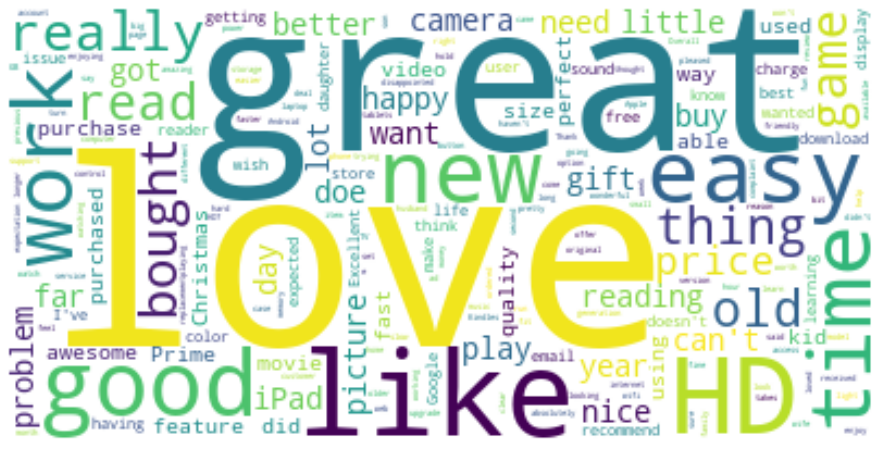

In [36]:
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

### Plotting Review Body WordCloud

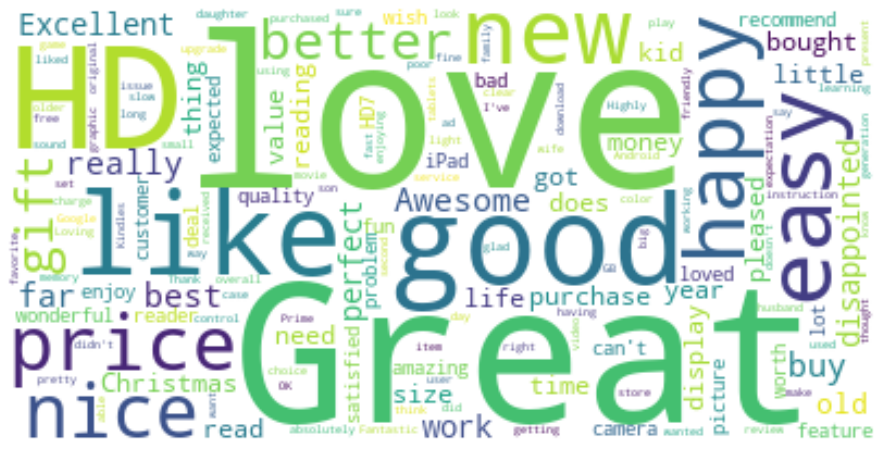

In [37]:
plt.imshow(word_cloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

From the wordcloud, we can agree to the percentages earlier found that most of the reviews are positive.

In [13]:
# create new column containing number of words from each review_body
word_tokens = [word_tokenize(review) for review in data.review_body]
# remove non alphabetic characters in token
clean_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
length = []
 
for i in range(len(clean_tokens)):
    length.append(len(clean_tokens[i]))
data['no_of_words'] = length  
data.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,no_of_words
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1,3
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0,30
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1,114
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1,201
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1,8


In [49]:
# Define the vectorizer and specify the arguments
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=200, stop_words=ENGLISH_STOP_WORDS).fit(data.review_body)

# Transform the vectorizer
num_txt = vect.transform(data.review_body)

# Transform to a data frame and specify the column names
num_df=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
num_df.head()

,34,able,absolutely,access,ads,amazing,amazon,android,app,apps,...,won,wonderful,work,working,works,works great,worth,year,year old,years
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.23004,0.0,0.000000,0.0,0.0,0.160827,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.176136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.290039,0.0,0.0,0.156780,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.549965,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
num_df['sentiment'] = data['sentiment']

num_df.head()

,34,able,absolutely,access,ads,amazing,amazon,android,app,apps,...,wonderful,work,working,works,works great,worth,year,year old,years,sentiment
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.23004,0.0,0.000000,0.0,0.0,0.160827,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.176136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.290039,0.0,0.0,0.156780,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.549965,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Building a Model

In [54]:
# define target and features
y = num_df.sentiment
X = num_df.drop('sentiment', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X, y)
print('Score of logistic regression: ', log_reg.score(X, y))

# predicting and calculating accuracy
y_predict = log_reg.predict(X)
print('Accuracy score of logistic regression: ', accuracy_score(y, y_predict))


Score of logistic regression:  0.886273747001232
Accuracy score of logistic regression:  0.886273747001232
